# Environmental Science and Technology
> Team Name: jsr
>
> Ameya Sharma
>
> Prerak Srivastava​
>
> Kushagra Kharbanda​
>
> Shavak Kansal​
>
> Shreeya Singh


## Relationship Between Worldwide Earthquake Distributions and Tectonic Plate Boundaries

In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import math

In [9]:
import folium
import pandas as pd


# this feed tracks every earthquake of magnitude 2.5 or greater over the last month
usgs_url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv'
df = pd.read_csv(usgs_url)

df.info() # let's take a look at our available columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1738 non-null   object 
 1   latitude         1738 non-null   float64
 2   longitude        1738 non-null   float64
 3   depth            1738 non-null   float64
 4   mag              1738 non-null   float64
 5   magType          1738 non-null   object 
 6   nst              1630 non-null   float64
 7   gap              1630 non-null   float64
 8   dmin             1410 non-null   float64
 9   rms              1738 non-null   float64
 10  net              1738 non-null   object 
 11  id               1738 non-null   object 
 12  updated          1738 non-null   object 
 13  place            1738 non-null   object 
 14  type             1738 non-null   object 
 15  horizontalError  1602 non-null   float64
 16  depthError       1738 non-null   float64
 17  magError      

### Making a map using Folium

In [10]:
import folium

# create a new map object
m = folium.Map(location=(0, 0), zoom_start=2)

# save our map to an interactive html file
m.save('earthquakes.html')

### Adding Earthquake Data Using Folium Circles
- Now, we will iterate through each earthquake in the DataFrame which will be represented by Folium's circle object.
We now achieve a map showing all the significant earthquakes over the past month.


### Visualizing Earthquake Magnitudes
- Instead of setting the radius of the circles representing the earthquakes as constant, we make the radius a function of the earthquake’s magnitude. Large magnitude quakes will be represented by large radius Circle markers.

In [11]:
# Same as before, we get the center and make the map object
m = folium.Map(location=(0, 0), zoom_start=2)

# go through each quake in set, make circle, and add to map.
for i in range(len(df)):
    if df.iloc[i]['mag'] > 3:
        folium.Circle(
            location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
            radius=df.iloc[i]['mag'] * 70000,
            weight=1,  # thickness of the border
            color='red',  # this is the color of the border
            opacity=0.3,  # this is the alpha for the border
            fill_color='red',  # fill is inside the circle
            fill_opacity=0.1,  # we will make that less opaque so we can see layers

        ).add_to(m)

# Same as before, we save it to file
m.save('earthquakes.html')

Text(0.5, 1.0, 'Magnitude Visualized Earthquakes')

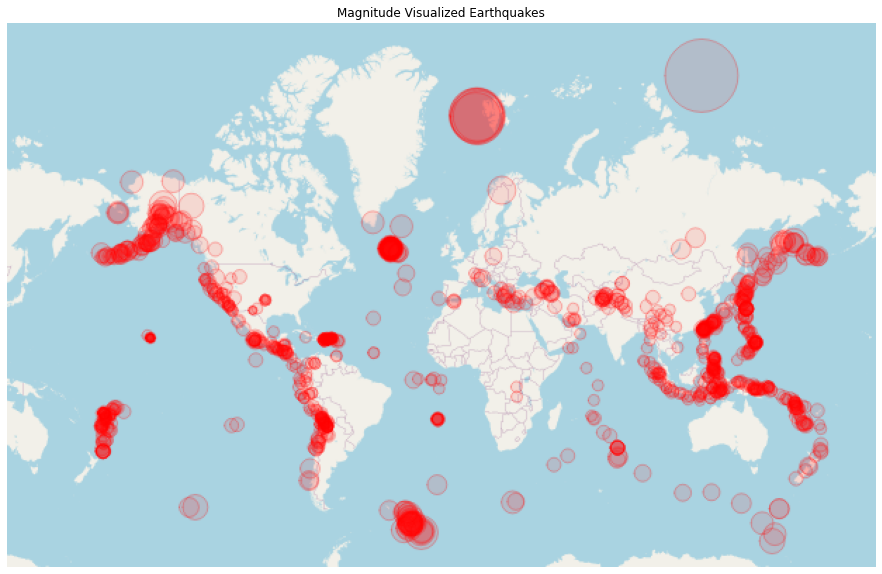

In [14]:
img = cv2.imread('./img/img1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,10))
plt.imshow(img)
plt.axis('off')
plt.title('Magnitude Visualized Earthquakes')

- We now see multiple earthquakes on top of each other. In addition to the relative sizes to represent magnitude, the darker red now represents hot spots (multiple quakes), and gives it a heatmap effect.

### Adding Tectonic Plates Using GeoJSON
- Now, to verify the worldwide earthquake distributions and tectonic plate boundaries we will add Tectonic Plates Using GeoJSON
- we will lay the tectonics plate boundaries as an overlay to the world map.
- link to polygons for the tectonic boundaries stored in geoJSON format: https://github.com/fraxen/tectonicplates/blob/master/GeoJSON/PB2002_boundaries.json 

In [12]:
url = 'https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json'

folium.GeoJson(
    url,
    name='geojson'
).add_to(m)

folium.LayerControl().add_to(m)

# Same as before, we save it to file
m.save('earthquakes.html')

Text(0.5, 1.0, 'Earthquakes with tectonic boundaries')

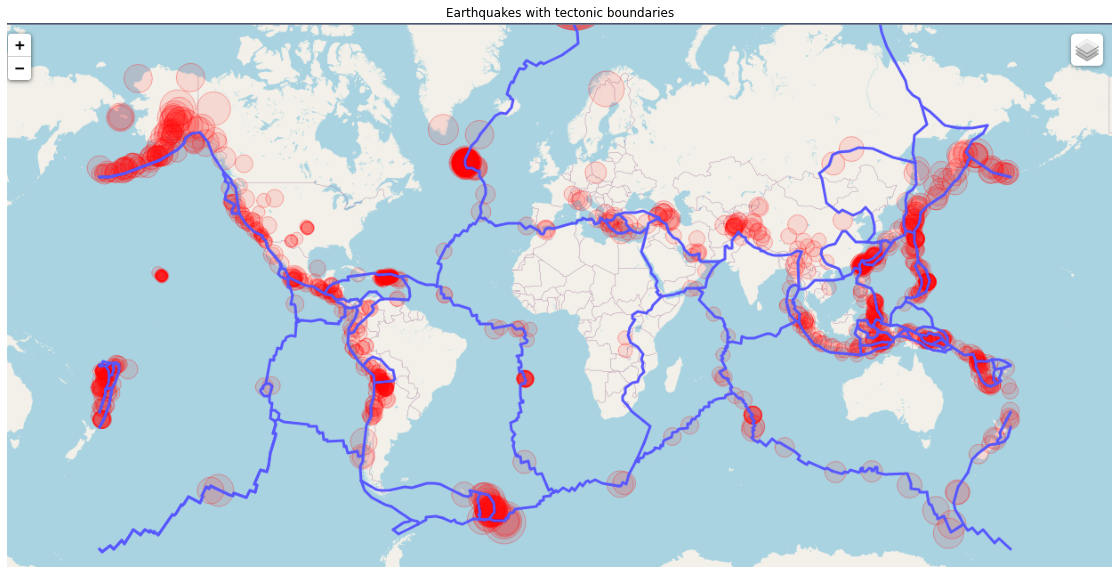

In [15]:
img = cv2.imread('./img/img2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,10))
plt.imshow(img)
plt.axis('off')
plt.title('Earthquakes with tectonic boundaries')

Thus, we observe that Earthquakes are neatly placed along the boundaries of our tectonic plates